In [4]:
# from transformers import DistilBertTokenizer, DistilBertModel
from sentence_transformers import SentenceTransformer
import torch
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.decomposition import PCA


In [5]:
# Example list of news articles
df = pd.read_csv("dataset7.csv", on_bad_lines='skip')
df

,link,title,health_annotation,content,cluster,x,y,annotation
0,https://foodbabe.com/my-visit-to-the-white-hou...,My Visit To The White House – Exposing Big Foo...,1,"Someone needs to pinch me, because I almost ca...",5,0.031964,-0.180670,0
1,https://foodbabe.com/wk-kelloggs-ceo-gary-piln...,WK Kellogg’s CEO Gary Pilnick breaks his silen...,1,WK Kellogg’s CEO Gary Pilnick finally breaks h...,0,-0.025548,-0.116120,0
2,https://foodbabe.com/general-mills-has-been-pu...,General Mills has been put on notice: Remove d...,1,Our movement is growing bigger and faster than...,0,0.068932,0.001133,0
3,https://foodbabe.com/food-policy-expert-asks-k...,Food Policy Expert asks Kellogg’s CEO: “Would ...,1,"When I saw the New York Post headline, “Ex-FDA...",0,0.026184,-0.133570,0
4,https://foodbabe.com/w-k-kelloggs-cereal-heire...,W.K. Kellogg’s Cereal Heiress Exposes Kellogg’...,1,"Ever since we delivered 400,000 signed petitio...",0,-0.009792,-0.082135,0
...,...,...,...,...,...,...,...,...
6777,https://www.eaglenews.ph/infographics-national...,In China,1,"(Eagle News) — In the Philippines, cancer rema...",3,0.235913,0.046816,1
6778,https://www.eaglenews.ph/dr-congo-ebola-death-...,unhappiness tracks poor air quality,1,"KINSHASA, DR Congo (AFP) — The death toll from...",9,0.155704,-0.329712,1
6779,https://www.eaglenews.ph/s-africas-neighbours-...,Swine flu kills 40 in western India,1,"JOHANNESBURG, South Africa (AFP) — Countries n...",9,0.046792,-0.216438,1
6780,https://www.eaglenews.ph/hong-kong-scientists-...,INFOGRAPHICS: National Cancer Consciousness Week,1,"HONG KONG, China (AFP) — Hong Kong scientists ...",9,0.216361,-0.238194,1


In [6]:
df = df.dropna(subset=['content']).reset_index(drop=True)  # Critical: reset_index
df = df[df['annotation'] == 1].reset_index(drop=True)
texts = df['content'].tolist()  # Now texts and df have identical length
print(len(texts))

3647


In [7]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts, show_progress_bar=True)

Batches: 100%|██████████| 114/114 [05:31<00:00,  2.91s/it]


In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(embeddings)

KMeans(n_clusters=5, random_state=42)

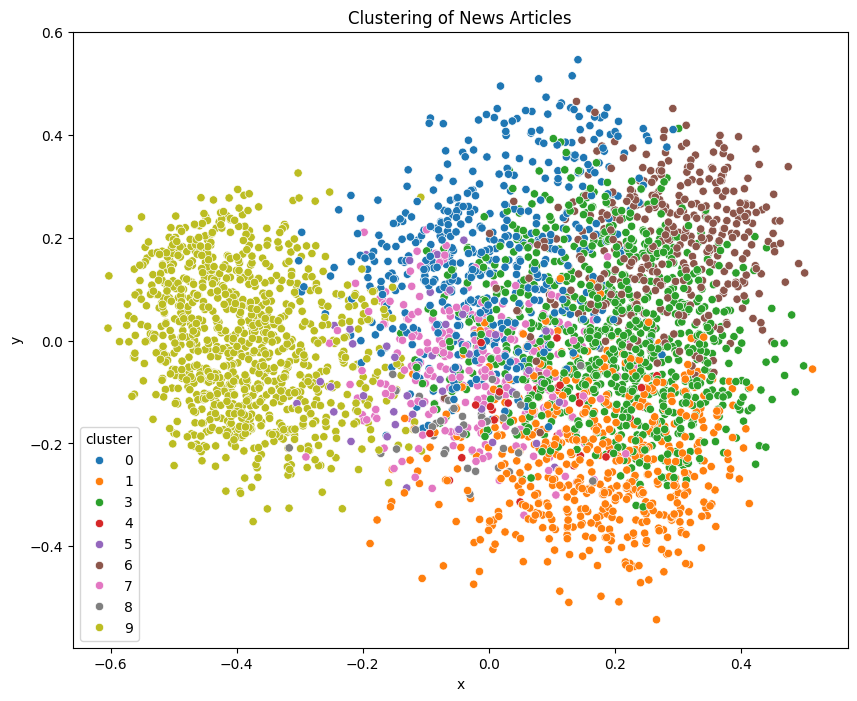

In [17]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
df['x'] = reduced_embeddings[:, 0]
df['y'] = reduced_embeddings[:, 1]
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='x', y='y', hue='cluster', palette='tab10')
plt.title("Clustering of News Articles")
plt.show()

In [10]:
# embeddings
print(len(embeddings))

3647


In [11]:
# Cluster
embeddings = np.array(embeddings)
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# Map results
# for text, label in zip(df, clusters):
#     print(f"[Cluster {label}] {text}")


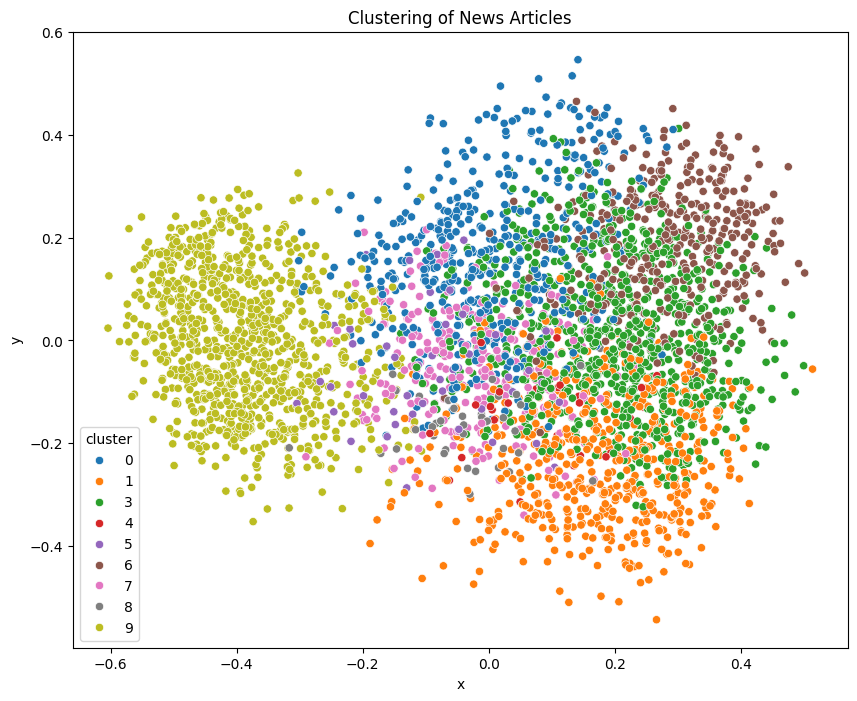

In [12]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
df['x'] = reduced_embeddings[:, 0]
df['y'] = reduced_embeddings[:, 1]
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='x', y='y', hue='cluster', palette='tab10')
plt.title("Clustering of News Articles")
plt.show()

In [13]:
# kmeans = KMeans(n_clusters=10, random_state=42)
# kmeans.fit(embeddings)
# df['cluster'] = kmeans.labels_  # Works now!

Cluster sizes:
Cluster 0: 1012 articles
Cluster 1: 428 articles
Cluster 2: 966 articles
Cluster 3: 599 articles
Cluster 4: 642 articles


C:\Users\agaro\AppData\Local\Temp\ipykernel_2652\2120646061.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=cluster_labels, y=[0]*len(cluster_labels), jitter=0.25, palette="deep")


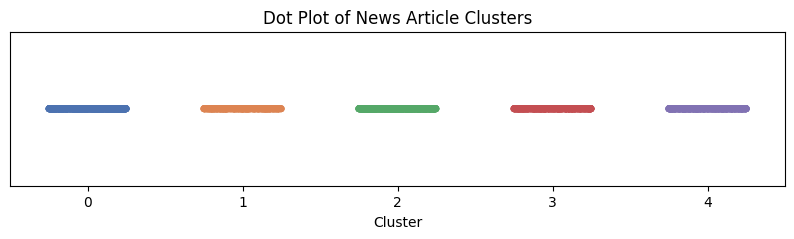


🔹 Cluster 0 examples:
• Feb. 20, 2025 – Athletes with certain heart conditions have long been told by their doctors what the...
• Feb. 6. 2025 – The FDA has approved a new wearable device for adults with advanced Parkinson’s disea...
• Feb. 5, 2025 – Staying fit is one of the best ways to lower the risk of dementia — even for those wi...
• Jan. 30, 2025 -- When he isn’t performing cardiac stress tests on heart and lung disease patients, B...
• Jan. 28, 2025 – As he takes the microphone for his confirmation hearing before the U.S. Senate Commi...
• Jan. 28, 2025 – Cannabis use can significantly impact the part of the brain responsible for followin...
• Jan. 23. 2025 – It’s easy to lose sight of nature in winter, amid the rush to escape cold, wet, and ...
• Jan. 23, 2025 – Living with attention deficit hyperactivity disorder comes with unique challenges, a...
• Jan. 22, 2025 – It was pitch black and smoky at 4 a.m., when Vivianne Parker, 66, of Altadena, Calif...
• Jan. 17, 2025 – Recen

In [18]:
# Count articles in each cluster
from collections import Counter
cluster_counts = Counter(cluster_labels)

# Print cluster sizes
print("Cluster sizes:")
for cluster_id, count in sorted(cluster_counts.items()):
    print(f"Cluster {cluster_id}: {count} articles")

# 📊 Dot plot (strip style)
plt.figure(figsize=(10, 2))
sns.stripplot(x=cluster_labels, y=[0]*len(cluster_labels), jitter=0.25, palette="deep")
plt.xlabel("Cluster")
plt.title("Dot Plot of News Article Clusters")
plt.yticks([])
plt.show()

# 📌 Get example articles from each cluster
samples_per_cluster = 10
cluster_examples = {i: [] for i in range(5)}

for i, (text, label) in enumerate(zip(texts, cluster_labels)):
    if len(cluster_examples[label]) < samples_per_cluster:
        cluster_examples[label].append(text)

# Display samples
for cluster_id, examples in cluster_examples.items():
    print(f"\n🔹 Cluster {cluster_id} examples:")
    for example in examples:
        print(f"• {example[:100]}...")  # Print first 100 chars

In [35]:
df['cluster'] = cluster_labels
# Save to CSV
df.to_csv('clustered_samples.csv', index=False)


In [26]:
from transformers import DistilBertTokenizer
from transformers import AutoTokenizer
from collections import Counter

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')


In [1]:

# Tokenize and count using transformer tokenizer
for cluster_id, texts in cluster_counts.items():
    all_text = " ".join(texts)
    tokens = tokenizer.tokenize(all_text)
    
    # Optional: remove special tokens like [CLS], [SEP], ##subwords
    cleaned_tokens = [t for t in tokens if not t.startswith('##') and t.isalpha()]

    counts = Counter(cleaned_tokens)

    # print(f"\n[DistilBERT Tokenizer] Top words for Cluster {cluster_id}:")
    # for word, freq in counts.most_common(20):
    #     print(f"{word}: {freq}")

    # Optionally generate a word cloud from cleaned tokens (join into string)
    wordcloud_input = " ".join(cleaned_tokens)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(wordcloud_input)

    top_words = wordcloud.words_

    # Print top 20 words and weights
    print(f"\nTop words for Cluster {cluster_id}:")
    for word, score in list(top_words.items())[:50]:
        print(f"{word}: {score:.4f}")

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Cluster {cluster_id}")
    plt.show()


NameError: name 'cluster_counts' is not defined